In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
dataset=pd.read_csv("C:/heart.csv")

In [4]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
! pip install sklearn

In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
dataset=pd.read_csv("C:/heart.csv")
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, :-1].values

In [9]:
#from sklearn.cross_validate import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=regressor.predict(x_test)

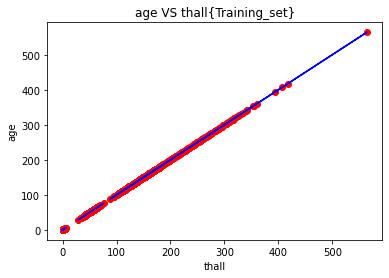

In [12]:
#VISUALSING THE TRAINING SET RESULTS

plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title('age VS thall{Training_set}')
plt.xlabel('thall')
plt.ylabel('age')
plt.show()

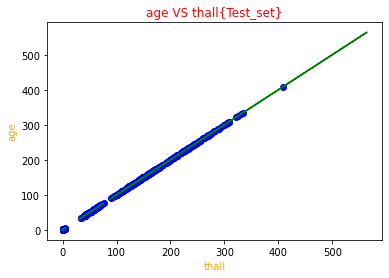

In [13]:
#VISUALSING THE TEST SET RESULTS

plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title('age VS thall{Test_set}',color="red")
plt.xlabel('thall',color="orange")
plt.ylabel('age',color="orange")
plt.show()

Text(0, 0.5, 'age')

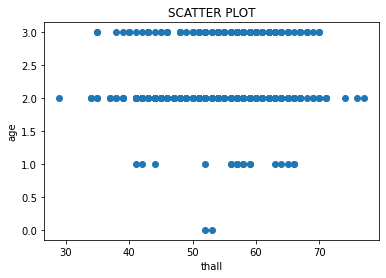

In [14]:
plt.scatter(dataset['age'], dataset['thall'])
plt.title('SCATTER PLOT')
plt.xlabel('thall')
plt.ylabel('age')

Text(0, 0.5, 'age')

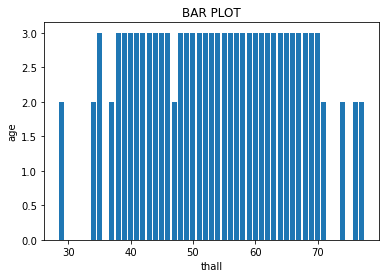

In [15]:
plt.bar(dataset['age'], dataset['thall'])
plt.title('BAR PLOT')
plt.xlabel('thall')
plt.ylabel('age')

<AxesSubplot:>

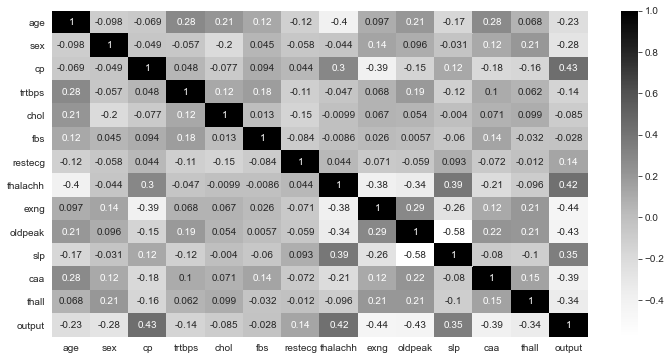

In [92]:
figure = plt.figure(figsize=(12,6))

sns.heatmap(dataset.corr(),data= dataset,annot= True,cmap = 'Greys')

<AxesSubplot:xlabel='age', ylabel='chol'>

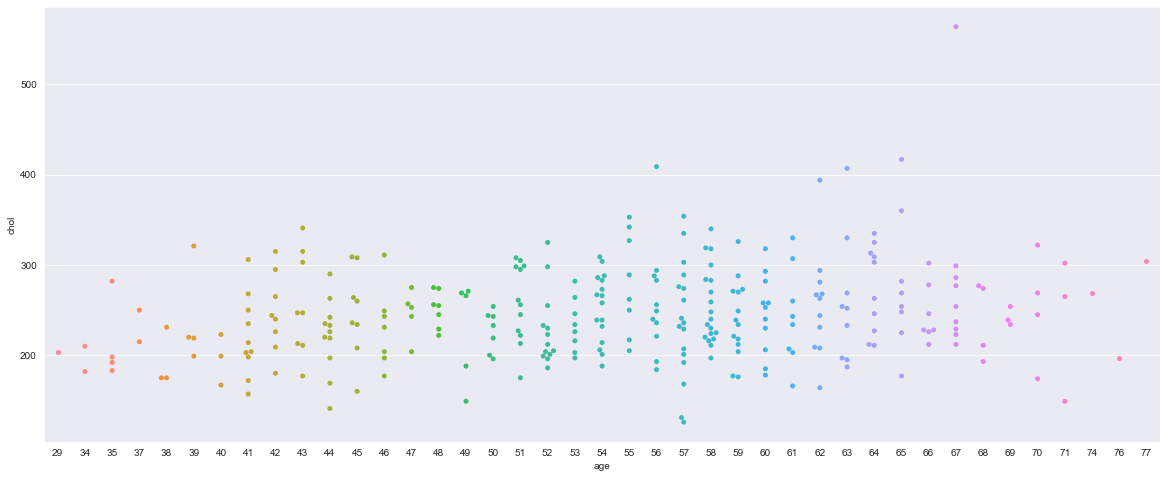

In [93]:
figure = plt.figure(figsize=(20,8))

sns.swarmplot(x= 'age',y = 'chol',data= dataset)

<AxesSubplot:xlabel='sex', ylabel='thalachh'>

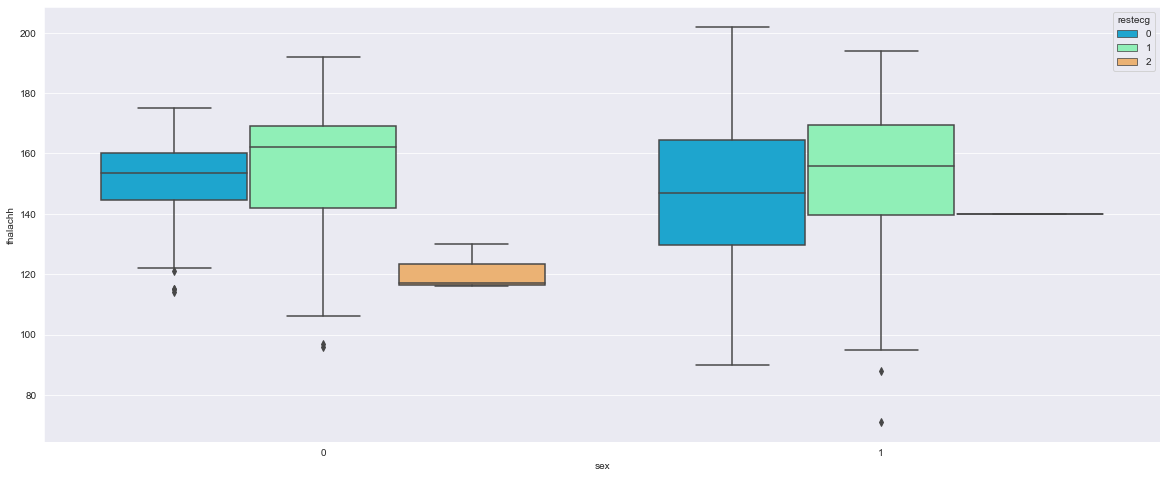

In [94]:
figure = plt.figure(figsize=(20,8))

sns.boxplot(x= 'sex',y='thalachh',hue = 'restecg',data=dataset,palette = 'rainbow')

<AxesSubplot:xlabel='trtbps', ylabel='count'>

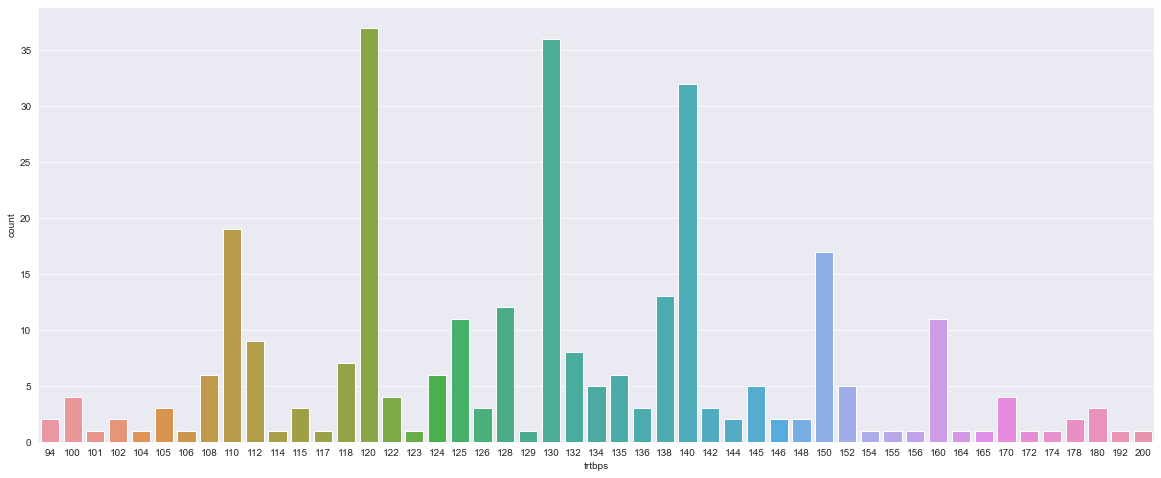

In [95]:
sns.set_style('darkgrid')
figure = plt.figure(figsize=(20,8))
sns.countplot(x= 'trtbps',data=dataset)

Text(0.5, 0, 'Thalachh')

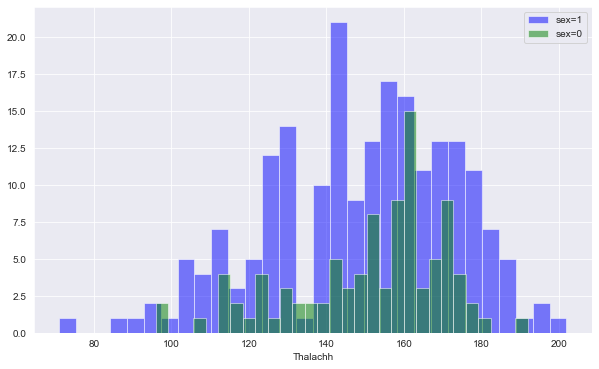

In [96]:
plt.figure(figsize=(10,6))
dataset[dataset['sex']==1]['thalachh'].hist(alpha=0.5,color='blue',
                                              bins=30,label='sex=1')
dataset[dataset['sex']==0]['thalachh'].hist(alpha=0.5,color='green',
                                              bins=30,label='sex=0')
plt.legend()
plt.xlabel('Thalachh')

<AxesSubplot:xlabel='age', ylabel='thall'>

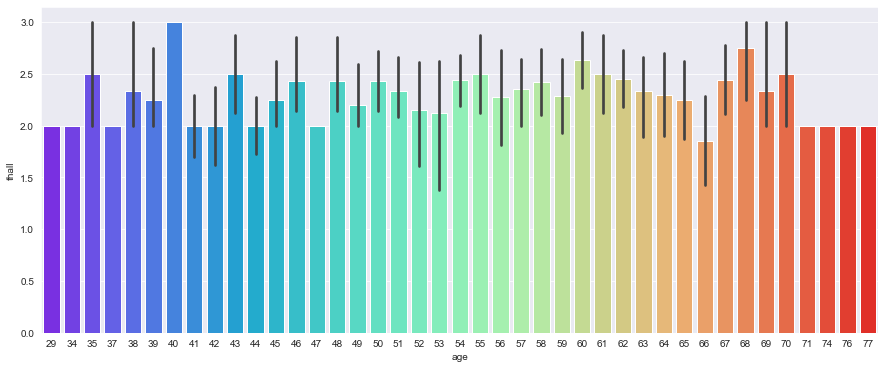

In [97]:
sns.set_style('darkgrid')
figure = plt.figure(figsize=(15,6))
sns.barplot(x= 'age', y ='thall',data=dataset,palette='rainbow')

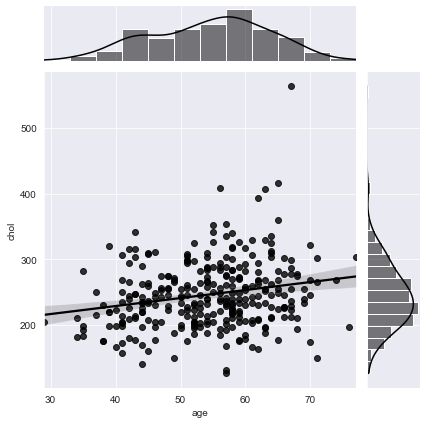

In [98]:
sns.jointplot(x= 'age',y= 'chol',data= dataset,color ='black',kind='reg')

<Figure size 1080x432 with 0 Axes>

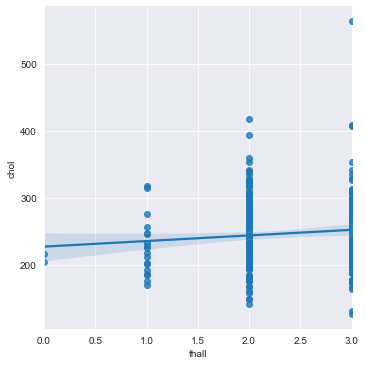

In [99]:
figure = plt.figure(figsize=(15,6))
sns.lmplot(x= 'thall',y='chol',data=dataset)

In [100]:
lm=LinearRegression()

In [101]:
lm.fit(x_train,y_train)

LinearRegression()

In [102]:
predictions = lm.predict(x_test)

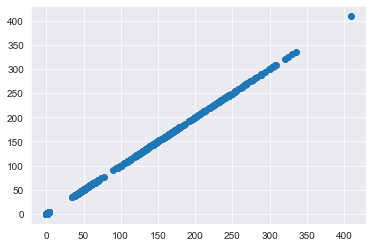

In [103]:
plt.scatter(y_test,predictions)